In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
data=pd.read_csv('/content/gld_price_data.csv')

In [6]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
data.shape

(2290, 6)

In [8]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
correlation=data.corr()

<Axes: >

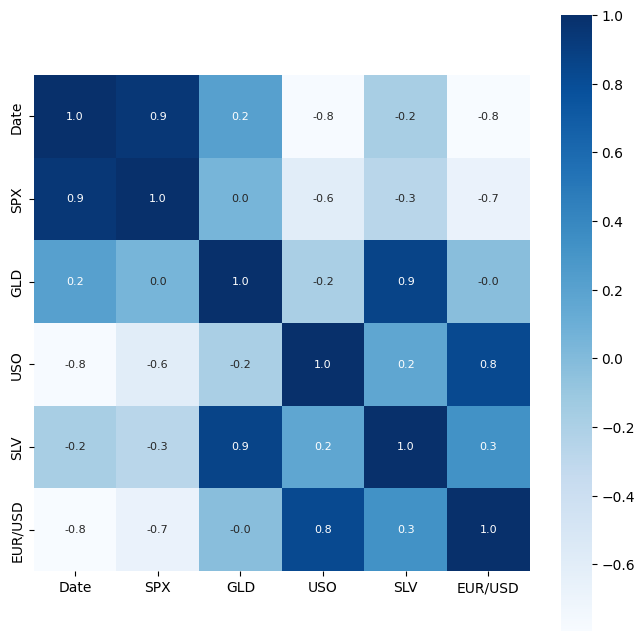

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1F',annot=True,annot_kws={'size':8},cmap='Blues')

In [21]:
x=data.drop(['Date','GLD'],axis=1)

In [22]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [23]:
y=data['GLD']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [26]:
model=RandomForestRegressor(n_estimators=100)

In [27]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
xtrainpredict=model.predict(x_train)
xtestPredict=model.predict(x_test)

In [32]:
print(xtrainpredict)
print(xtestPredict)

[109.97889787 114.7184009   90.70730017 ... 130.48039665 159.89649625
 114.84599962]
[168.27649906  82.3533996  115.88080056 127.78070095 120.64860144
 154.8368977  150.67999841 126.05080062 117.60539875 125.9543003
 116.81490095 171.36930097 141.7283986  167.95309888 115.21400009
 117.48390027 140.92550262 170.13620081 159.65790304 157.41780032
 155.18120003 125.39080019 176.18940013 157.56840318 125.17060041
  93.83749917  78.21550007 120.47599996 119.06489942 167.53649997
  88.22940055 125.42380035  91.120701   117.70979994 121.09169934
 136.52110069 115.5202013  115.34470016 149.44809989 107.29820109
 104.26430247  87.16919788 126.5433005  117.47759983 153.95629884
 119.65750009 108.3782997  108.24049902  93.15520052 127.18089792
  74.87070049 113.64999876 121.07250006 111.20049929 119.06559918
 121.12559931 159.07250024 168.38190152 147.16769744  85.79919869
  94.31220028  86.89579869  90.67280005 119.06550064 126.42230052
 127.6646999  169.37209973 122.29249963 117.51339892  98.9

In [33]:
xtrain_mse=metrics.r2_score(y_train,xtrainpredict)
xtest_mse=metrics.r2_score(y_test,xtestPredict)

In [34]:
print(xtrain_mse)
print(xtest_mse)

0.9984064781651347
0.9890769937304994


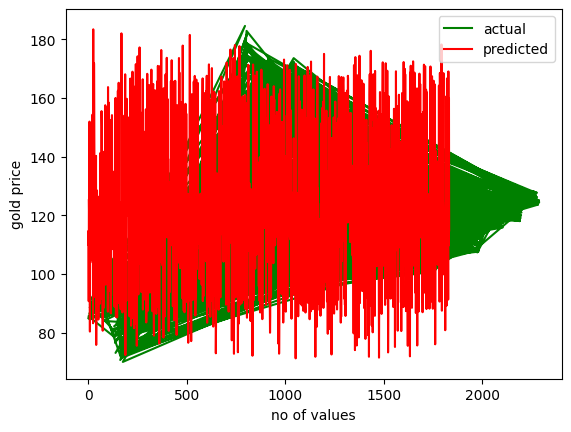

In [39]:
plt.plot(y_train,color='green',label='actual')
plt.plot(xtrainpredict,color='red',label='predicted')
plt.xlabel('no of values')
plt.ylabel('gold price')
plt.legend()
plt.show()

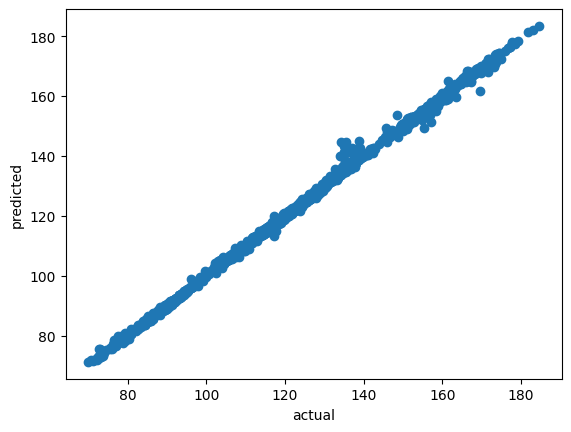

In [38]:
plt.scatter(y_train,xtrainpredict)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()